In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
from scipy.signal import savgol_filter
import seaborn as sns
import ast
sns.set()

In [2]:
!ls ../../res/

ls: cannot access '../../res/': No such file or directory


In [15]:
path = "../../"
path = "../results/2_new_NN_architecture/4_results_report/0_air/standby_2/"
df_e = pd.read_csv(path+'res/ue_delay.csv', delimiter=";")

df_e

,time,ue_id,service_id,generated,first_sent,processed,delay,times_sent
0,1.304245,iodjiesh,adas,0.5,1.200008,1.304245,0.804245,1
1,1.304296,ovkojy,adas,0.5,1.200009,1.304296,0.804296,1
2,1.408483,iodjiesh,adas,1.0,1.304245,1.408483,0.408483,1
3,1.408536,ovkojy,adas,1.0,1.304296,1.408536,0.408536,1
4,1.504245,ocshitcl,adas,0.5,1.400008,1.504245,1.004245,1
...,...,...,...,...,...,...,...,...
17944,179.611758,ayquexar,adas,179.5,179.500000,179.611758,0.111758,1
17945,179.611808,isfikti,adas,179.5,179.500000,179.611808,0.111808,1
17946,179.611858,onghoji,adas,179.5,179.500000,179.611858,0.111858,1
17947,179.808536,ijhipvo,adas,179.0,179.702019,179.808536,0.808536,1


In [16]:
df_c = pd.read_csv(path+'res_2/ue_delay.csv', delimiter=";")
df_c

,time,ue_id,service_id,generated,first_sent,processed,delay,times_sent
0,1.301534,oggluv,adas,0.5,1.200004,1.301534,0.801534,1
1,1.304230,iodjiesh,adas,0.5,1.200003,1.304230,0.804230,1
2,1.304281,ovkojy,adas,0.5,1.200004,1.304281,0.804281,1
3,1.304907,ofikco,adas,0.5,1.200003,1.304907,0.804907,1
4,1.308234,agdrea,adas,0.5,1.200003,1.308234,0.808234,1
...,...,...,...,...,...,...,...,...
17943,179.606658,ofikco,adas,179.5,179.500000,179.606658,0.106658,1
17944,179.802879,ouvdank,adas,179.0,179.702023,179.802879,0.802879,1
17945,179.809206,atzumbon,adas,179.0,179.702024,179.809206,0.809206,1
17946,179.903735,ouvdank,adas,179.5,179.802879,179.903735,0.403735,1


In [17]:
df_results = pd.DataFrame()

df_results["e-delay"] = df_e.describe()["delay"]
df_results["c-delay"] = df_c.describe()["delay"]
df_results["saving-delay"] = (df_results["e-delay"]/df_results["c-delay"]-1)*100

df_results

,e-delay,c-delay,saving-delay
count,17949.000000,17948.000000,0.005572
mean,0.213743,0.209416,2.066506
std,0.333391,0.304327,9.550217
min,0.100729,0.100730,-0.001115
25%,0.102570,0.102757,-0.181588
50%,0.105509,0.105830,-0.302898
75%,0.111031,0.110357,0.610635
max,3.704408,2.207493,67.810661


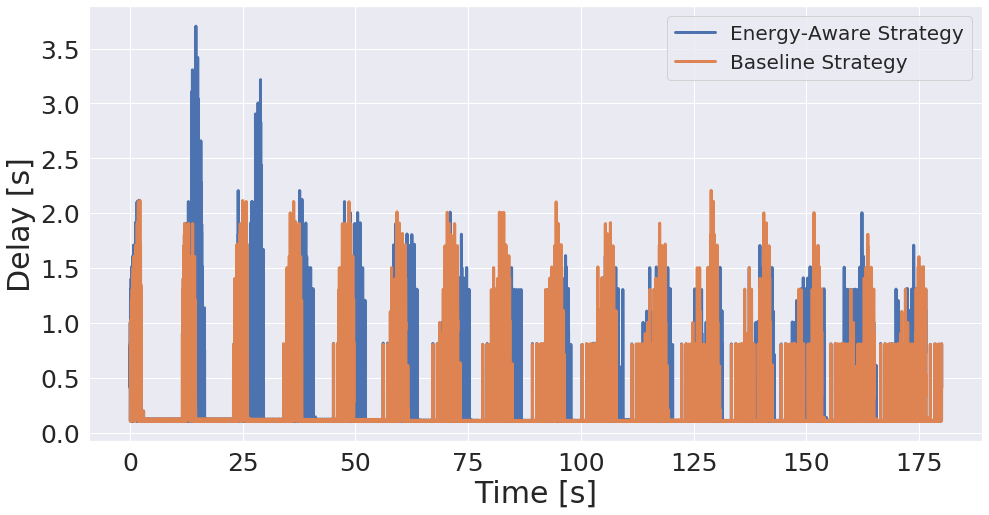

In [19]:
sim_time = 180
time_e = np.linspace(0, sim_time, len(df_e))
time_c = np.linspace(0, sim_time, len(df_c))


plt.figure(figsize=(16,8))
plt.plot(time_e, df_e["delay"], label="Energy-Aware Strategy", linewidth=3)
plt.plot(time_c, df_c["delay"], label="Baseline Strategy", linewidth=3)
plt.ylabel("Delay [s]", fontsize=30)
plt.xlabel('Time [s]', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.show()